# Lab 09 – Frequent Patterns

Name: Bryce DiRisio

Partner: Eli Mauskopf

Class: CSCI 349 - Intro to Data Mining

Semester: 2020SP

Instructor: Brian King

The code below is needed to run the lab

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### 1) [P] Add the import statements.

In [2]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

### 2) [P] Go to the page: http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/ . Enter the list dataset shown on the page. Then, copy the example code that transforms the list to a numpy encoded array, then to a pandas DataFrame with the correct column names. Output your data frame.

In [3]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

Apple   Corn   Dill   Eggs  Ice cream  Kidney Beans   Milk  Nutmeg  Onion  \
0  False  False  False   True      False          True   True    True   True   
1  False  False   True   True      False          True  False    True   True   
2   True  False  False   True      False          True   True   False  False   
3  False   True  False  False      False          True   True   False  False   
4  False   True  False   True       True          True  False   False   True   

   Unicorn  Yogurt  
0    False    True  
1    False    True  
2    False   False  
3     True    True  
4    False   False

### 3) [P] Show the result of describe() and info() on your dataframe.

In [4]:
display(df.describe())
df.info()

Apple   Corn   Dill  Eggs Ice cream Kidney Beans  Milk Nutmeg Onion  \
count       5      5      5     5         5            5     5      5     5   
unique      2      2      2     2         2            1     2      2     2   
top     False  False  False  True     False         True  True  False  True   
freq        4      3      4     4         4            5     3      3     3   

       Unicorn Yogurt  
count        5      5  
unique       2      2  
top      False   True  
freq         4      3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
Apple           5 non-null bool
Corn            5 non-null bool
Dill            5 non-null bool
Eggs            5 non-null bool
Ice cream       5 non-null bool
Kidney Beans    5 non-null bool
Milk            5 non-null bool
Nutmeg          5 non-null bool
Onion           5 non-null bool
Unicorn         5 non-null bool
Yogurt          5 non-null bool
dtypes: bool(11)
memory usage: 183.0 bytes


### 4) [P] Following along the mlxtend user guide, use the apriori algorithm to final all frequent itemsets with a min_support of 0.6. Show the resulting dataframe, and store the result, since you'll have many selection exercises next. All selection exercises must be done from this resulting frame. Set use_colnames=True. It'll be much easier to interpret your patterns.

In [5]:
df_apriori = apriori(df,min_support=0.6,use_colnames=True)
df_apriori

support                     itemsets
0       0.8                       (Eggs)
1       1.0               (Kidney Beans)
2       0.6                       (Milk)
3       0.6                      (Onion)
4       0.6                     (Yogurt)
5       0.8         (Eggs, Kidney Beans)
6       0.6                (Onion, Eggs)
7       0.6         (Milk, Kidney Beans)
8       0.6        (Onion, Kidney Beans)
9       0.6       (Kidney Beans, Yogurt)
10      0.6  (Onion, Eggs, Kidney Beans)

### 5) [P] Select all frequent itemsets that have support => 0.8

In [6]:
df_apriori[df_apriori['support'] >= 0.8]

support              itemsets
0      0.8                (Eggs)
1      1.0        (Kidney Beans)
5      0.8  (Eggs, Kidney Beans)

### 6) [P] Select all frequent itemsets with at least 2 items. In their documentation, they often create additional helper variables to make it easier to select your data. That's entirely up to you. (I tend to be a purist, and reserve additional variables for only very complex selection criteria. Computing the length of an itemset is not one of them! It's entirely up to you.)

In [7]:
df_apriori['length'] = [len(x) for x in df_apriori['itemsets']]
df_apriori[df_apriori['length']>=2]

support                     itemsets  length
5       0.8         (Eggs, Kidney Beans)       2
6       0.6                (Onion, Eggs)       2
7       0.6         (Milk, Kidney Beans)       2
8       0.6        (Onion, Kidney Beans)       2
9       0.6       (Kidney Beans, Yogurt)       2
10      0.6  (Onion, Eggs, Kidney Beans)       3

### 7) [P] Select the frequent itemsets that contain an 'Onion' in the itemset.

In [8]:
pd.DataFrame([df_apriori.iloc[i] for i in range(df_apriori.shape[0]) if 'Onion' in df_apriori.iloc[i]['itemsets']])

support                     itemsets  length
3       0.6                      (Onion)       1
6       0.6                (Onion, Eggs)       2
8       0.6        (Onion, Kidney Beans)       2
10      0.6  (Onion, Eggs, Kidney Beans)       3

### 8) [P] Select the frequent itemsets that contain both 'Onion' and 'Eggs' in the itemset. (HINT: You should have 2 frequent itemsets selected. And, if you haven't learned about the set type in Python and all of the standard set operations, they can really make these types of questions much easier.)

In [9]:
pd.DataFrame([df_apriori.iloc[i] for i in range(df_apriori.shape[0]) if 'Onion' in df_apriori.iloc[i]['itemsets'] and 'Eggs' in df_apriori.iloc[i]['itemsets']])

support                     itemsets  length
6       0.6                (Onion, Eggs)       2
10      0.6  (Onion, Eggs, Kidney Beans)       3

### 9) [P] Select the frequent itemsets that contain either an 'Onion' or 'Kidney Beans' (or both) in the itemset. (HINT: You should have 8 frequent itemsets output.)

In [10]:
pd.DataFrame([df_apriori.iloc[i] for i in range(df_apriori.shape[0]) if 'Onion' in df_apriori.iloc[i]['itemsets'] or 'Kidney Beans' in df_apriori.iloc[i]['itemsets']])

support                     itemsets  length
1       1.0               (Kidney Beans)       1
3       0.6                      (Onion)       1
5       0.8         (Eggs, Kidney Beans)       2
6       0.6                (Onion, Eggs)       2
7       0.6         (Milk, Kidney Beans)       2
8       0.6        (Onion, Kidney Beans)       2
9       0.6       (Kidney Beans, Yogurt)       2
10      0.6  (Onion, Eggs, Kidney Beans)       3

### 10) [P] http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/ contains the all the information about the association rule interestingness metrics, as well as giving you the code to generate the association rules. (NOTE – they mention a function called generate_rules(). The function is association_rules().) Generate rules with a minimum confidence of 0.7. Store your resulting data frame called rules. Show the entire data frame. (You should have 12 rules).

In [11]:
rules = association_rules(df_apriori, min_threshold = 0.7)
rules

antecedents            consequents  antecedent support  \
0                  (Eggs)         (Kidney Beans)                 0.8   
1          (Kidney Beans)                 (Eggs)                 1.0   
2                 (Onion)                 (Eggs)                 0.6   
3                  (Eggs)                (Onion)                 0.8   
4                  (Milk)         (Kidney Beans)                 0.6   
5                 (Onion)         (Kidney Beans)                 0.6   
6                (Yogurt)         (Kidney Beans)                 0.6   
7           (Onion, Eggs)         (Kidney Beans)                 0.6   
8   (Onion, Kidney Beans)                 (Eggs)                 0.6   
9    (Eggs, Kidney Beans)                (Onion)                 0.8   
10                (Onion)   (Eggs, Kidney Beans)                 0.6   
11                 (Eggs)  (Onion, Kidney Beans)                 0.8   

    consequent support  support  confidence  lift  leverage  conviction  
0                  1.0      0.8        1.00  1.00      0.00         inf  
1                  0.8      0.8        0.80  1.00      0.00         1.0  
2                  0.8      0.6        1.00  1.25      0.12         inf  
3                  0.6      0.6        0.75  1.25      0.12         1.6  
4                  1.0      0.6        1.00  1.00      0.00         inf  
5                  1.0      0.6        1.00  1.00      0.00         inf  
6                  1.0      0.6        1.00  1.00      0.00         inf  
7                  1.0      0.6        1.00  1.00      0.00         inf  
8                  0.8      0.6        1.00  1.25      0.12         inf  
9                  0.6      0.6        0.75  1.25      0.12         1.6  
10                 0.8      0.6        1.00  1.25      0.12         inf  
11                 0.6      0.6        0.75  1.25      0.12         1.6

### 11) [P] Output the top 5 rules in descending order by "lift", with the secondary sort key by "confidence".

In [12]:
rules.sort_values(['lift','confidence'],ascending = [False,False]).head(5)

#Source: https://stackoverflow.com/questions/17141558/how-to-sort-a-dataframe-in-python-pandas-by-two-or-more-columns

antecedents           consequents  antecedent support  \
2                 (Onion)                (Eggs)                 0.6   
8   (Onion, Kidney Beans)                (Eggs)                 0.6   
10                (Onion)  (Eggs, Kidney Beans)                 0.6   
3                  (Eggs)               (Onion)                 0.8   
9    (Eggs, Kidney Beans)               (Onion)                 0.8   

    consequent support  support  confidence  lift  leverage  conviction  
2                  0.8      0.6        1.00  1.25      0.12         inf  
8                  0.8      0.6        1.00  1.25      0.12         inf  
10                 0.8      0.6        1.00  1.25      0.12         inf  
3                  0.6      0.6        0.75  1.25      0.12         1.6  
9                  0.6      0.6        0.75  1.25      0.12         1.6

### 12) [P] Select all rules that have a 1.0 support for the antecedent.

In [13]:
pd.DataFrame([rules.iloc[i] for i in range(rules.shape[0]) if 1.0 == rules.iloc[i]['antecedent support']])

antecedents consequents  antecedent support  consequent support  \
1  (Kidney Beans)      (Eggs)                 1.0                 0.8   

   support  confidence  lift  leverage  conviction  
1      0.8         0.8   1.0       0.0         1.0

### 13) [P] Select all rules that have at least 3 or more items represented in the rule (i.e. the union of the antecedent and consequent >= 3.)

In [14]:
pd.DataFrame([rules.iloc[i] for i in range(rules.shape[0]) if len(rules.iloc[i]['antecedents']) + len(rules.iloc[i]['consequents']) >= 3])

antecedents            consequents  antecedent support  \
7           (Onion, Eggs)         (Kidney Beans)                 0.6   
8   (Onion, Kidney Beans)                 (Eggs)                 0.6   
9    (Eggs, Kidney Beans)                (Onion)                 0.8   
10                (Onion)   (Eggs, Kidney Beans)                 0.6   
11                 (Eggs)  (Onion, Kidney Beans)                 0.8   

    consequent support  support  confidence  lift  leverage  conviction  
7                  1.0      0.6        1.00  1.00      0.00         inf  
8                  0.8      0.6        1.00  1.25      0.12         inf  
9                  0.6      0.6        0.75  1.25      0.12         1.6  
10                 0.8      0.6        1.00  1.25      0.12         inf  
11                 0.6      0.6        0.75  1.25      0.12         1.6

### 14) [P] Select the rules that have confidence >= 0.75 and a lift > 1

In [15]:
pd.DataFrame([rules.iloc[i] for i in range(rules.shape[0]) if rules.iloc[i]['confidence'] >= 0.75 and rules.iloc[i]['lift']>1])

antecedents           consequents  antecedent support  \
2                 (Onion)                (Eggs)                 0.6   
8   (Onion, Kidney Beans)                (Eggs)                 0.6   
10                (Onion)  (Eggs, Kidney Beans)                 0.6   

    consequent support  support  confidence  lift  leverage  conviction  
2                  0.8      0.6         1.0  1.25      0.12         inf  
8                  0.8      0.6         1.0  1.25      0.12         inf  
10                 0.8      0.6         1.0  1.25      0.12         inf

---
# Chipotle Data

### 16) [P] Read in the Chipotle dataset: url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv' df_chip = pd.read_csv(url, sep = '\t')

In [16]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
df_chip = pd.read_csv(url,sep='\t' )

### 17) [P] Show the result of df_chip.info(verbose=True) You should have five variables.

In [17]:
df_chip.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


### 18) [P] Show the result of describe(include='all')

In [18]:
df_chip.describe(include='all')

order_id     quantity     item_name choice_description item_price
count   4622.000000  4622.000000          4622               3376       4622
unique          NaN          NaN            50               1043         78
top             NaN          NaN  Chicken Bowl        [Diet Coke]     $8.75 
freq            NaN          NaN           726                134        730
mean     927.254868     1.075725           NaN                NaN        NaN
std      528.890796     0.410186           NaN                NaN        NaN
min        1.000000     1.000000           NaN                NaN        NaN
25%      477.250000     1.000000           NaN                NaN        NaN
50%      926.000000     1.000000           NaN                NaN        NaN
75%     1393.000000     1.000000           NaN                NaN        NaN
max     1834.000000    15.000000           NaN                NaN        NaN

### 19) [P] Show the first 10 observations

In [19]:
df_chip.head(10)

order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                                                NaN     $2.39   
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98   
5  [Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...    $10.98   
6                                                NaN     $1.69   
7  [Tomatillo Red Chili Salsa, [Fajita Vegetables...    $11.75   
8  [Tomatillo Green Chili Salsa, [Pinto Beans, Ch...     $9.25   
9  [Fresh Tomato Salsa, [Rice, Black Beans, Pinto...     $9.25

### 20) [M] Study what you see so far. Minimally, you should notice that you have three variables that need to be transformed into usable types. Which ones, and what do you need to do with them?

There are three variables present that are of type 'Object'. These variables are: 'item_name','choice_description',and 'item_price'. To get these into a working type, we need to modify our variables. For the 'item_price' variable, we need to take out the '$' character and convert the remaining string into a float type. For the 'item_name' variable, we should make it categorical so we can observe patterns that occur between item purchases. Finally, for the 'choice_description' variable, we would need to also use a transaction encoder to make it categorical. The only other problem we would have to deal with is that it is currently in string format, so we'd need to manipulate/clean the strings before we pass them through the function.

### 21) [P] Let's start doing some preprocessing. Convert the item_price field to a floating-point number.

In [20]:
df_chip['item_price'] = df_chip['item_price'].str.replace('$', '')
df_chip['item_price'] = df_chip['item_price'].astype(dtype = float)
df_chip

order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description  item_price  
0                                                   NaN        2.39  
1                                          [Clementine]        3.39  
2                                               [Apple]        3.39  
3                                                   NaN        2.39  
4     [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98  
...                                                 ...         ...  
4617  [Fresh Tomato Salsa, [Rice, Black Beans, Sour ...       11.75  
4618  [Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...       11.75  
4619  [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...       11.25  
4620  [Fresh Tomato Salsa, [Fajita Vegetables, Lettu...        8.75  
4621  [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...        8.75  

[4622 rows x 5 columns]

### 22) [P] Convert the item_name to a categorical variable (HINT: Use pd.Categorical())

In [21]:
df_chip['item_name'] = pd.Categorical(df_chip['item_name'])
display(df_chip)
df_chip.info()

order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description  item_price  
0                                                   NaN        2.39  
1                                          [Clementine]        3.39  
2                                               [Apple]        3.39  
3                                                   NaN        2.39  
4     [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98  
...                                                 ...         ...  
4617  [Fresh Tomato Salsa, [Rice, Black Beans, Sour ...       11.75  
4618  [Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...       11.75  
4619  [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...       11.25  
4620  [Fresh Tomato Salsa, [Fajita Vegetables, Lettu...        8.75  
4621  [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...        8.75  

[4622 rows x 5 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null category
choice_description    3376 non-null object
item_price            4622 non-null float64
dtypes: category(1), float64(1), int64(2), object(1)
memory usage: 152.0+ KB


### 23) [P] How many unique item_name values are there?

In [22]:
df_chip['item_name'].value_counts().count()

50

### 24) [P] Show all of the unique values in item_name . Do you see any potential problems? (Leave them! Don't fix them. Just pay close attention. Need a hint? Salsa)

In [23]:
display(pd.DataFrame(df_chip['item_name'].unique()))

0
0            Chips and Fresh Tomato Salsa
1                                    Izze
2                        Nantucket Nectar
3   Chips and Tomatillo-Green Chili Salsa
4                            Chicken Bowl
5                           Side of Chips
6                           Steak Burrito
7                        Steak Soft Tacos
8                     Chips and Guacamole
9                    Chicken Crispy Tacos
10                     Chicken Soft Tacos
11                        Chicken Burrito
12                            Canned Soda
13                       Barbacoa Burrito
14                       Carnitas Burrito
15                          Carnitas Bowl
16                          Bottled Water
17  Chips and Tomatillo Green Chili Salsa
18                          Barbacoa Bowl
19                                  Chips
20                     Chicken Salad Bowl
21                             Steak Bowl
22                    Barbacoa Soft Tacos
23                         Veggie Burrito
24                            Veggie Bowl
25                     Steak Crispy Tacos
26    Chips and Tomatillo Red Chili Salsa
27                  Barbacoa Crispy Tacos
28                      Veggie Salad Bowl
29     Chips and Roasted Chili-Corn Salsa
30     Chips and Roasted Chili Corn Salsa
31                    Carnitas Soft Tacos
32                          Chicken Salad
33                      Canned Soft Drink
34                       Steak Salad Bowl
35                      6 Pack Soft Drink
36    Chips and Tomatillo-Red Chili Salsa
37                                   Bowl
38                                Burrito
39                           Crispy Tacos
40                  Carnitas Crispy Tacos
41                            Steak Salad
42      Chips and Mild Fresh Tomato Salsa
43                      Veggie Soft Tacos
44                    Carnitas Salad Bowl
45                    Barbacoa Salad Bowl
46                                  Salad
47                    Veggie Crispy Tacos
48                           Veggie Salad
49                         Carnitas Salad

### 25) [P] How many distinct orders are there?

In [24]:
df_chip.iloc[df_chip.shape[0]-1][0]

1834

### 26) [P] Show a boxplot of the number of line items per order. Do NOT consider the quantity of each item, just the count of line items. (NOTE: Many items appear multiple times in an order. Don't worry about that. Just count the number of lines per order.) Your result should indicate that the majority of orders only have 1-3 items ordered.

{'whiskers': [<matplotlib.lines.Line2D at 0xb30b808>,
 'caps': [<matplotlib.lines.Line2D at 0xb30bf08>,
 'boxes': [<matplotlib.lines.Line2D at 0xb301e88>],
 'medians': [<matplotlib.lines.Line2D at 0xb316f48>],
 'fliers': [<matplotlib.lines.Line2D at 0xb31d708>],
 'means': []}

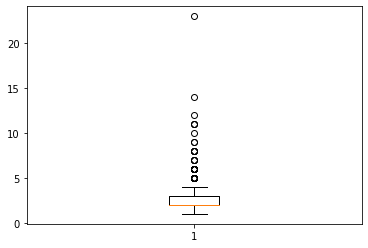

In [25]:
plt.boxplot(df_chip['order_id'].value_counts())

### 27) [P] Show a boxplot of the TOTAL number of items per order. Now, you must consider the quantity of each item in each order. (The box plot will be similar to the previous, with the exception that there will be more outliers, and the maximum outlier will be 35.)

{'whiskers': [<matplotlib.lines.Line2D at 0xb674e48>,
 'caps': [<matplotlib.lines.Line2D at 0xb678e08>,
 'boxes': [<matplotlib.lines.Line2D at 0xb674448>],
 'medians': [<matplotlib.lines.Line2D at 0xb67dd88>],
 'fliers': [<matplotlib.lines.Line2D at 0xb67de88>],
 'means': []}

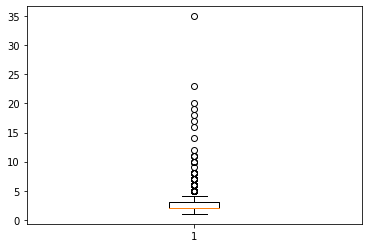

In [26]:
plt.boxplot(df_chip['quantity'].groupby(df_chip['order_id']).sum())

### 28) [P] What were the top 5 ordered items by total quantity? Report the item and its total quantity ordered. Be sure to consider the quantity of each item ordered!

In [27]:
temp = pd.DataFrame(df_chip.loc[:,'quantity':'item_name']) #item name quantity
temp.groupby(temp['item_name']).sum().sort_values(by='quantity',ascending=False).head(5)

quantity
item_name                    
Chicken Bowl              761
Chicken Burrito           591
Chips and Guacamole       506
Steak Burrito             386
Canned Soft Drink         351

### 29) [P] What is the total number of "Steak Burrito" ordered?

In [28]:
temp.groupby(temp['item_name']).sum().loc['Steak Burrito']

quantity    386
Name: Steak Burrito, dtype: int64

### 30) [P] What is mean price for an order (NOTE – This is NOT just a mean of the item_price column!)

In [29]:
df_chip.groupby(df_chip['order_id']).sum()['item_price'].mean()

18.81142857142869

### 31) [P] What was total revenue for the day?

In [30]:
print('$' + str(df_chip['item_price'].sum()))

$34500.16


### 32) [P] What was the largest total price for a single order? Show the order number and the total price.

In [31]:
df_maxPrice = df_chip.groupby(df_chip['order_id']).sum().sort_values(by='item_price',ascending=False)

print('The max price was $' + str(df_maxPrice.iloc[0,1]))
print('The order number was ' + str(df_maxPrice.index[0]))

The max price was $205.25
The order number was 926


### 33) [P] Show the entire order to your answer to the previous question (NOTE: This should show you how some orders can contain multiple lines of the same item. Not uncommon!)

In [32]:
df_chip[df_chip['order_id'] == 926]

order_id  quantity           item_name  \
2304       926         1       Steak Burrito   
2305       926         1        Chicken Bowl   
2306       926         1        Chicken Bowl   
2307       926         1        Chicken Bowl   
2308       926         1          Steak Bowl   
2309       926         1        Chicken Bowl   
2310       926         1       Steak Burrito   
2311       926         1     Chicken Burrito   
2312       926         1        Chicken Bowl   
2313       926         1        Chicken Bowl   
2314       926         1  Chicken Salad Bowl   
2315       926         1          Steak Bowl   
2316       926         1     Chicken Burrito   
2317       926         1          Steak Bowl   
2318       926         1        Chicken Bowl   
2319       926         1          Steak Bowl   
2320       926         1     Chicken Burrito   
2321       926         1        Chicken Bowl   
2322       926         1        Chicken Bowl   
2323       926         1    Barbacoa Burrito   
2324       926         1     Chicken Burrito   
2325       926         1          Steak Bowl   
2326       926         1         Veggie Bowl   

                                     choice_description  item_price  
2304  [Fresh Tomato Salsa, [Rice, Sour Cream, Lettuce]]        9.25  
2305  [Roasted Chili Corn Salsa, [Fajita Vegetables,...        8.75  
2306  [Roasted Chili Corn Salsa, [Fajita Vegetables,...        8.75  
2307  [Roasted Chili Corn Salsa, [Fajita Vegetables,...        8.75  
2308  [Fresh Tomato Salsa, [Rice, Black Beans, Lettu...        9.25  
2309  [Fresh Tomato Salsa, [Rice, Black Beans, Chees...        8.75  
2310  [Roasted Chili Corn Salsa, [Rice, Cheese, Sour...        9.25  
2311  [Fresh Tomato Salsa, [Rice, Black Beans, Chees...        8.75  
2312              [Fresh Tomato Salsa, [Rice, Lettuce]]        8.75  
2313  [Fresh Tomato Salsa, [Rice, Cheese, Sour Cream...        8.75  
2314     [Roasted Chili Corn Salsa, [Rice, Sour Cream]]        8.75  
2315  [Fresh Tomato Salsa, [Rice, Black Beans, Chees...        9.25  
2316  [Roasted Chili Corn Salsa, [Rice, Black Beans,...        8.75  
2317  [Roasted Chili Corn Salsa, [Rice, Black Beans,...        9.25  
2318  [Roasted Chili Corn Salsa, [Fajita Vegetables,...        8.75  
2319               [Fresh Tomato Salsa, [Rice, Cheese]]        9.25  
2320      [Fresh Tomato Salsa, [Rice, Cheese, Lettuce]]        8.75  
2321  [Roasted Chili Corn Salsa, [Rice, Pinto Beans,...        8.75  
2322         [Roasted Chili Corn Salsa, [Rice, Cheese]]        8.75  
2323  [Fresh Tomato Salsa, [Rice, Black Beans, Chees...        9.25  
2324  [Tomatillo Red Chili Salsa, [Rice, Cheese, Sou...        8.75  
2325  [Tomatillo Red Chili Salsa, [Rice, Black Beans...        9.25  
2326  [Roasted Chili Corn Salsa, [Rice, Black Beans,...        8.75

### 34) [P] What order had the largest total quantity of items purchased? Show the order number and the total number of items

In [33]:
df_chip.groupby(['order_id']).sum().sort_values(by='quantity',ascending=False).head(1)

quantity  item_price
order_id                      
1443            35      160.74

### 35) [P] Show the entire order to your answer to the previous question Frequent Patterns in Chipotle Data

In [34]:
df_chip[df_chip['order_id']==1443]

order_id  quantity                     item_name  \
3598      1443        15  Chips and Fresh Tomato Salsa   
3599      1443         7                 Bottled Water   
3600      1443         1             6 Pack Soft Drink   
3601      1443         3                Veggie Burrito   
3602      1443         4               Chicken Burrito   
3603      1443         3                 Steak Burrito   
3604      1443         2                 Bottled Water   

                                     choice_description  item_price  
3598                                                NaN       44.25  
3599                                                NaN       10.50  
3600                                             [Coke]        6.49  
3601  [Fresh Tomato Salsa, [Fajita Vegetables, Rice,...       33.75  
3602  [Fresh Tomato Salsa, [Rice, Black Beans, Chees...       35.00  
3603  [Fresh Tomato Salsa, [Rice, Black Beans, Chees...       27.75  
3604                                                NaN        3.00

### 36) [P] Recall that this dataset is a set of transactions, where each observation represents one item purchased as part of an order_id. However, the data are not read in this way. You need to transform this dataset to a collection of binary encoded transactions, where each row represents ONE transaction, and the columns are binary encoded variables, with each variable representing ONE item available for purchase at Chipotle. Convert your data. Your resulting data frame should have an index representing the order_id, and columns representing each possible item from the item_name variable. For now, a transaction will ignore the quantity of item purchased. The shape of your resulting data frame should be (1834,50)

In [35]:
df_by_id = df_chip.groupby('order_id')
dataset = []
#create 2D list of item names per order
for i in range(1,1835):
    dataset.append(list(df_by_id.get_group(i).item_name.astype(str)))

te_ary = te.fit(dataset).transform(dataset)
df_transactions = pd.DataFrame(te_ary.astype("int"), columns=te.columns_)
df_transactions

6 Pack Soft Drink  Barbacoa Bowl  Barbacoa Burrito  \
0                     0              0                 0   
1                     0              0                 0   
2                     0              0                 0   
3                     0              0                 0   
4                     0              0                 0   
...                 ...            ...               ...   
1829                  0              0                 0   
1830                  0              0                 0   
1831                  0              0                 0   
1832                  0              0                 0   
1833                  0              0                 0   

      Barbacoa Crispy Tacos  Barbacoa Salad Bowl  Barbacoa Soft Tacos  \
0                         0                    0                    0   
1                         0                    0                    0   
2                         0                    0                    0   
3                         0                    0                    0   
4                         0                    0                    0   
...                     ...                  ...                  ...   
1829                      0                    0                    0   
1830                      0                    0                    0   
1831                      0                    0                    0   
1832                      0                    0                    0   
1833                      0                    0                    0   

      Bottled Water  Bowl  Burrito  Canned Soda  ...  Steak Crispy Tacos  \
0                 0     0        0            0  ...                   0   
1                 0     0        0            0  ...                   0   
2                 0     0        0            0  ...                   0   
3                 0     0        0            0  ...                   0   
4                 0     0        0            0  ...                   0   
...             ...   ...      ...          ...  ...                 ...   
1829              0     0        0            0  ...                   0   
1830              1     0        0            0  ...                   0   
1831              0     0        0            0  ...                   0   
1832              0     0        0            0  ...                   0   
1833              0     0        0            0  ...                   0   

      Steak Salad  Steak Salad Bowl  Steak Soft Tacos  Veggie Bowl  \
0               0                 0                 0            0   
1               0                 0                 0            0   
2               0                 0                 0            0   
3               0                 0                 1            0   
4               0                 0                 0            0   
...           ...               ...               ...          ...   
1829            0                 0                 0            0   
1830            0                 0                 0            0   
1831            0                 0                 0            0   
1832            0                 0                 0            0   
1833            0                 0                 0            0   

      Veggie Burrito  Veggie Crispy Tacos  Veggie Salad  Veggie Salad Bowl  \
0                  0                    0             0                  0   
1                  0                    0             0                  0   
2                  0                    0             0                  0   
3                  0                    0             0                  0   
4                  0                    0             0                  0   
...              ...                  ...           ...                ...   
1829               1                    0             0                  0   
1830               0          

### 37) [P] Show the first 10 observations from your transaction data

In [36]:
df_transactions.head(10)

6 Pack Soft Drink  Barbacoa Bowl  Barbacoa Burrito  Barbacoa Crispy Tacos  \
0                  0              0                 0                      0   
1                  0              0                 0                      0   
2                  0              0                 0                      0   
3                  0              0                 0                      0   
4                  0              0                 0                      0   
5                  0              0                 0                      0   
6                  0              0                 0                      0   
7                  0              0                 0                      0   
8                  0              0                 0                      0   
9                  0              0                 0                      0   

   Barbacoa Salad Bowl  Barbacoa Soft Tacos  Bottled Water  Bowl  Burrito  \
0                    0                    0              0     0        0   
1                    0                    0              0     0        0   
2                    0                    0              0     0        0   
3                    0                    0              0     0        0   
4                    0                    0              0     0        0   
5                    0                    0              0     0        0   
6                    0                    0              0     0        0   
7                    0                    0              0     0        0   
8                    0                    0              0     0        0   
9                    0                    0              0     0        0   

   Canned Soda  ...  Steak Crispy Tacos  Steak Salad  Steak Salad Bowl  \
0            0  ...                   0            0                 0   
1            0  ...                   0            0                 0   
2            0  ...                   0            0                 0   
3            0  ...                   0            0                 0   
4            0  ...                   0            0                 0   
5            0  ...                   0            0                 0   
6            0  ...                   0            0                 0   
7            0  ...                   0            0                 0   
8            1  ...                   0            0                 0   
9            0  ...                   0            0                 0   

   Steak Soft Tacos  Veggie Bowl  Veggie Burrito  Veggie Crispy Tacos  \
0                 0            0               0                    0   
1                 0            0               0                    0   
2                 0            0               0                    0   
3                 1            0               0                    0   
4                 0            0               0                    0   
5                 0            0               0                    0   
6                 0            0               0                    0   
7                 0            0               0                    0   
8                 0            0               0                    0   
9                 0            0               0                    0   

   Veggie Salad  Veggie Salad Bowl  Veggie Soft Tacos  
0             0                  0                  0  
1             0                  0                  0  
2             0                  0                  0  
3             0                  0                  0  
4             0                  0                  0  
5             0                  0                  0  
6             0                  0                  0  
7             0                  0                  0  
8             0                  0                  0  
9             0                  0                  0  

[10 rows x 50 columns]

### 38) [P] Too often, many start by considering a minimum support that is arbitrarily large. Go ahead and use the apriori method to generate frequent itemsets with a minsup value of 0.5. What happened?

In [37]:
df_apriori = apriori(df_transactions,min_support=0.5,use_colnames=True)
df_apriori

#What happened is that there are no observations that have support values that high, so it returns an empty dataframe. 

Empty DataFrame
Columns: [support, itemsets]
Index: []

### 39) [P] Take a step back. Your previous outcome is why you ALWAYS perform essential EDA tasks before you dive into mining a dataset! Report a table that shows the number of transactions each item occurred in, sorted in order of most frequent to least. NOTE: That number essentially represents the absolute support for 1- itemsets! So, include a column that shows the relative support (i.e. the fraction of total transactions.) (HINT: The item with the highest support is 33.5%!)

In [38]:
df_transNum = pd.DataFrame((df_transactions == 1).sum(),columns = ['transactions'])
df_transNum['relative_support'] = df_transNum['transactions']/df_transactions.shape[0]
df_transNum.sort_values('transactions', ascending = False)


transactions  relative_support
Chicken Bowl                                    615          0.335333
Chicken Burrito                                 489          0.266630
Chips and Guacamole                             474          0.258451
Steak Burrito                                   342          0.186478
Canned Soft Drink                               276          0.150491
Chips                                           208          0.113413
Steak Bowl                                      188          0.102508
Bottled Water                                   154          0.083969
Chips and Fresh Tomato Salsa                    110          0.059978
Chicken Soft Tacos                              107          0.058342
Side of Chips                                   101          0.055071
Chicken Salad Bowl                               98          0.053435
Canned Soda                                      94          0.051254
Veggie Burrito                                   91          0.049618
Barbacoa Burrito                                 88          0.047983
Veggie Bowl                                      82          0.044711
Carnitas Bowl                                    67          0.036532
Barbacoa Bowl                                    61          0.033261
Carnitas Burrito                                 58          0.031625
Steak Soft Tacos                                 54          0.029444
6 Pack Soft Drink                                54          0.029444
Chips and Tomatillo Red Chili Salsa              46          0.025082
Chicken Crispy Tacos                             45          0.024537
Chips and Tomatillo Green Chili Salsa            43          0.023446
Carnitas Soft Tacos                              38          0.020720
Steak Crispy Tacos                               35          0.019084
Chips and Tomatillo-Green Chili Salsa            31          0.016903
Steak Salad Bowl                                 28          0.015267
Nantucket Nectar                                 26          0.014177
Barbacoa Soft Tacos                              25          0.013631
Chips and Roasted Chili Corn Salsa               22          0.011996
Chips and Tomatillo-Red Chili Salsa              19          0.010360
Veggie Salad Bowl                                18          0.009815
Chips and Roasted Chili-Corn Salsa               18          0.009815
Izze                                             17          0.009269
Barbacoa Crispy Tacos                            11          0.005998
Barbacoa Salad Bowl                               9          0.004907
Chicken Salad                                     9          0.004907
Carnitas Crispy Tacos                             7          0.003817
Veggie Soft Tacos                                 7          0.003817
Veggie Salad                                      6          0.003272
Carnitas Salad Bowl                               6          0.003272
Burrito                                           4          0.002181
Steak Salad                                       4          0.002181
Bowl                                              2          0.001091
Salad                                             1          0.000545
Crispy Tacos                                      1          0.000545
Chips and Mild Fresh Tomato Salsa                 1          0.000545
Carnitas Salad                                    1          0.000545
Veggie Crispy Tacos                               1          0.000545

### 40) [P] Now, make a smarter decision. Like many large, real-world transaction datasets, data is sparse! You have many variables, and most observations use only a handful of them. This is the definition of a sparse dataset. You need a better minsup value. Regenerate frequent itemsets, but now use a minsup of 0.005. How many frequent itemsets were reported? Report your frequent items sorted by decreasing support order.

In [39]:
df_apriori = apriori(df_transactions,min_support=0.005,use_colnames=True).sort_values(by='support',ascending=False)
df_apriori

#There are 146 frequent itemsets being reported that meet this threshold.

support                                           itemsets
11   0.335333                                     (Chicken Bowl)
12   0.266630                                  (Chicken Burrito)
18   0.258451                              (Chips and Guacamole)
29   0.186478                                    (Steak Burrito)
7    0.150491                                (Canned Soft Drink)
..        ...                                                ...
109  0.005453        (Chips and Guacamole, Chicken Crispy Tacos)
132  0.005453                  (Steak Burrito, Steak Soft Tacos)
131  0.005453                          (Veggie Bowl, Steak Bowl)
112  0.005453                   (Chicken Salad Bowl, Steak Bowl)
119  0.005453  (Chips and Guacamole, Chips and Fresh Tomato S...

[146 rows x 2 columns]

### 41) [M] In the context of association rules, explain the difference between support, confidence, lift, leverage and conviction.

The support statistic is a measure that describes how frequent a certain itemset is within a given dataset.

Confidence is an actual probability that a consequent will come to fruition given the antecedent condition.

The lift metric measures how 'exactly' the antecedent and consequent occur together. A lift metric greater than one signifies a positive relationship where the presence of one condition improves the chances of the other condition occurring. This differs from a lift metric below 1, which sould signify that the presence of one condition diminishes the chances of the other condition occurring. Finally, a lift metric of exactly one would signify a similar pattern of occurence with them being statistically independent.

Leverage is a difference metric that is computed between two frequent conditions appering together, and the frequency of the conditions assuming independence.

Finally, conviction shows us how often a consequent is expected to occur without the antecedent condition, assuming both conditions were independent. 

SOURCE: https://michael.hahsler.net/research/association_rules/measures.html

### 42) [P] Generate all association rules that meet a minimum support of 0.01. How many rules were output in total?

In [40]:
rules = association_rules(df_apriori, metric = 'support', min_threshold = 0.01)
rules
#The results show that 108 rules were outputted

antecedents            consequents  antecedent support  \
0    (Chips and Guacamole)         (Chicken Bowl)            0.258451   
1           (Chicken Bowl)  (Chips and Guacamole)            0.335333   
2           (Chicken Bowl)                (Chips)            0.335333   
3                  (Chips)         (Chicken Bowl)            0.113413   
4    (Chips and Guacamole)      (Chicken Burrito)            0.258451   
..                     ...                    ...                 ...   
103   (Chicken Salad Bowl)  (Chips and Guacamole)            0.053435   
104    (6 Pack Soft Drink)      (Chicken Burrito)            0.029444   
105      (Chicken Burrito)    (6 Pack Soft Drink)            0.266630   
106  (Chips and Guacamole)        (Bottled Water)            0.258451   
107        (Bottled Water)  (Chips and Guacamole)            0.083969   

     consequent support   support  confidence      lift  leverage  conviction  
0              0.335333  0.081243    0.314346  0.937416 -0.005424    0.969392  
1              0.258451  0.081243    0.242276  0.937416 -0.005424    0.978653  
2              0.113413  0.066521    0.198374  1.749124  0.028490    1.105985  
3              0.335333  0.066521    0.586538  1.749124  0.028490    1.607568  
4              0.266630  0.062159    0.240506  0.902022 -0.006752    0.965603  
..                  ...       ...         ...       ...       ...         ...  
103            0.258451  0.010360    0.193878  0.750151 -0.003451    0.919896  
104            0.266630  0.010360    0.351852  1.319624  0.002509    1.131485  
105            0.029444  0.010360    0.038855  1.319624  0.002509    1.009791  
106            0.083969  0.010360    0.040084  0.477369 -0.011342    0.954282  
107            0.258451  0.010360    0.123377  0.477369 -0.011342    0.845915  

[108 rows x 9 columns]

### 43) [P] Show only the rules that have a lift > 2, but sorted in order of decreasing confidence. What is your strongest rule?

In [41]:
rules_confidenceSorted = rules.sort_values(by='confidence',ascending=False)
display(rules_confidenceSorted[rules_confidenceSorted['lift'] >= 2])

antecedents                        consequents  \
57             (Bottled Water, Chips)                     (Chicken Bowl)   
56      (Bottled Water, Chicken Bowl)                            (Chips)   
26                      (Canned Soda)                    (Steak Burrito)   
28  (Canned Soft Drink, Chicken Bowl)                            (Chips)   
58              (Chicken Bowl, Chips)                    (Bottled Water)   
34                    (Bottled Water)                            (Chips)   
59                    (Bottled Water)              (Chicken Bowl, Chips)   
33                            (Chips)  (Canned Soft Drink, Chicken Bowl)   
35                            (Chips)                    (Bottled Water)   
61                            (Chips)      (Bottled Water, Chicken Bowl)   
27                    (Steak Burrito)                      (Canned Soda)   
60                     (Chicken Bowl)             (Bottled Water, Chips)   

    antecedent support  consequent support   support  confidence      lift  \
57            0.019084            0.335333  0.015267    0.800000  2.385691   
56            0.037623            0.113413  0.015267    0.405797  3.578038   
26            0.051254            0.186478  0.019629    0.382979  2.053751   
28            0.060523            0.113413  0.019084    0.315315  2.780232   
58            0.066521            0.083969  0.015267    0.229508  2.733234   
34            0.083969            0.113413  0.019084    0.227273  2.003934   
59            0.083969            0.066521  0.015267    0.181818  2.733234   
33            0.113413            0.060523  0.019084    0.168269  2.780232   
35            0.113413            0.083969  0.019084    0.168269  2.003934   
61            0.113413            0.037623  0.015267    0.134615  3.578038   
27            0.186478            0.051254  0.019629    0.105263  2.053751   
60            0.335333            0.019084  0.015267    0.045528  2.385691   

    leverage  conviction  
57  0.008868    3.323337  
56  0.011000    1.492061  
26  0.010071    1.318467  
28  0.012220    1.294883  
58  0.009681    1.188891  
34  0.009561    1.147347  
59  0.009681    1.140918  
33  0.012220    1.129544  
35  0.009561    1.101355  
61  0.011000    1.112080  
27  0.010071    1.060363  
60  0.008868    1.027706

In [42]:
print('THE STRONGEST RULE:')
rules_confidenceSorted.head(1)

THE STRONGEST RULE:


antecedents     consequents  antecedent support  \
57  (Bottled Water, Chips)  (Chicken Bowl)            0.019084   

    consequent support   support  confidence      lift  leverage  conviction  
57            0.335333  0.015267         0.8  2.385691  0.008868    3.323337

### 44) [M] Consider yourself the data scientist hired to help Chipotle understand item purchasing patterns. Interpret the following rule for the non data scientist. Be careful not to say, "if your customers purchase canned soft drinks AND chips, they are also going to buy chicken bowls." Think! What do strong association rules convey?

Breaking this down by metric, we first see that the Antecedent Support value is 0.031625. This tells us that around 3% of all customers will buy the antecedents (Canned Soda and Chips). We also see that the Consequent Support value is 0.335333, so we can estimate that around 33% of people will buy chicken bowls, all assuming representative data.

Our support value is 0.019084, meaning that the frequency of customers buying Soft Drinks, Chips, and Chicken Bowls is 0.02. Thus, from the data, we can estimate that 2% of transactions will contain these items.

Our confidence metric is 0.603448, telling us that if people buy soft drinks and chips, around 60% of them will purchase a chicken bowl.

Finally, our lift statistic is 1.799551. Since our lift statistic is larger than 1.0, we can say that people who buy the soft drink and chips together will be MORE likely to also buy a chicken bowl.

### 45) [P] Suppose your boss is interested in what items are most likely related to a purchase of "Chips and Guacamole". Using your rule set generated, first select the rules that have "Chips and Guacamole" listed in the consequent itemset. Sort the rules by confidence, then by lift. And interpret your findings. Identify the item(s) that are the most suggestive of including "Chips and Guacamole" when purchased, and state why.

In [43]:
rules.loc[rules['consequents'] == frozenset({'Chips and Guacamole'})].sort_values(['confidence','lift'], ascending=False)

antecedents            consequents  \
93                 (6 Pack Soft Drink)  (Chips and Guacamole)   
40                    (Veggie Burrito)  (Chips and Guacamole)   
62                       (Veggie Bowl)  (Chips and Guacamole)   
39                (Chicken Soft Tacos)  (Chips and Guacamole)   
23                        (Steak Bowl)  (Chips and Guacamole)   
88                  (Barbacoa Burrito)  (Chips and Guacamole)   
1                       (Chicken Bowl)  (Chips and Guacamole)   
5                    (Chicken Burrito)  (Chips and Guacamole)   
19                 (Canned Soft Drink)  (Chips and Guacamole)   
9                      (Steak Burrito)  (Chips and Guacamole)   
79   (Canned Soft Drink, Chicken Bowl)  (Chips and Guacamole)   
103               (Chicken Salad Bowl)  (Chips and Guacamole)   
107                    (Bottled Water)  (Chips and Guacamole)   

     antecedent support  consequent support   support  confidence      lift  \
93             0.029444            0.258451  0.011450    0.388889  1.504688   
40             0.049618            0.258451  0.016903    0.340659  1.318079   
62             0.044711            0.258451  0.014722    0.329268  1.274004   
39             0.058342            0.258451  0.017448    0.299065  1.157143   
23             0.102508            0.258451  0.028899    0.281915  1.090785   
88             0.047983            0.258451  0.011996    0.250000  0.967300   
1              0.335333            0.258451  0.081243    0.242276  0.937416   
5              0.266630            0.258451  0.062159    0.233129  0.902022   
19             0.150491            0.258451  0.033806    0.224638  0.869168   
9              0.186478            0.258451  0.041439    0.222222  0.859822   
79             0.060523            0.258451  0.012541    0.207207  0.801726   
103            0.053435            0.258451  0.010360    0.193878  0.750151   
107            0.083969            0.258451  0.010360    0.123377  0.477369   

     leverage  conviction  
93   0.003841    1.213443  
40   0.004079    1.124682  
62   0.003166    1.105581  
39   0.002370    1.057943  
23   0.002405    1.032675  
88  -0.000406    0.988731  
1   -0.005424    0.978653  
5   -0.006752    0.966979  
19  -0.005089    0.956390  
9   -0.006756    0.953420  
79  -0.003101    0.935362  
103 -0.003451    0.919896  
107 -0.011342    0.845915

Looking at the data above, we can see that the strongest relationship seems to be between (6 Pack Soft Drink) and (Chips and Guacamole). The confidence level is at 0.47619, meaning that around 48% of all customers who bought a 6 pack of drinks that day also bought Chips & Guac. We can also see that the lift value for that relationship is 1.842475. This tells us that the number of people who bought Chips & Guac with the Soft drinks is 1.8x that of the number of people who bought chips and guac without the soft drinks.

### 46) [P] These data suggest that the "Chicken Bowl" is the single most frequent item purchased for this particular location. Great. Let's dive into those chicken bowls more. As you know, Chipotle lets you customize your items. That's what the choice_description field is for. Process all of the items listed in the "choice_description" field by creating a new transaction dataset representing binary encoded transaction data for only Chicken Bowl. Note – this is tricky because the choice_description variable is read in as a long string. The string itself represents a list, and quite often, it's a list of lists. You need to process this to be an actual flattened list of items. Then, you can easily convert these to transactions. This page will give you an idea on how to do it. https://chrisalbon.com/python/data_wrangling/pandas_expand_cells_containing_lists/ . However, keep in mind that many of these lists contain lists themselves! You may need to just write a python function that takes in a list of lists, and returns a single list of all of the items flattened out. Then, apply that function.

In [44]:
df_chicken = df_chip.loc[df_chip['item_name'] == 'Chicken Bowl',:].iloc[:,[3]]

df_chicken['choice_description'] = df_chicken['choice_description'].apply(lambda x: x.replace('[',''))
df_chicken['choice_description'] = df_chicken['choice_description'].apply(lambda x: x.replace(']',''))
df_chicken['choice_description'] = df_chicken['choice_description'].apply(lambda x: x.replace('-',' '))
df_chicken = df_chicken['choice_description'].apply(lambda x: list(i.strip() for i in x.split(',')))

tf = TransactionEncoder()

tf_ary = tf.fit(df_chicken).transform(df_chicken)
df_chicken = pd.DataFrame(tf_ary, columns=tf.columns_)
df_chicken

Black Beans  Cheese  Fajita Vegetables  Fajita Veggies  \
0           True    True              False           False   
1          False    True              False           False   
2          False    True               True           False   
3           True    True               True           False   
4          False    True              False            True   
..           ...     ...                ...             ...   
721         True    True              False           False   
722         True    True              False           False   
723         True   False              False           False   
724        False    True              False           False   
725         True    True              False           False   

     Fresh Tomato (Mild)  Fresh Tomato Salsa  Fresh Tomato Salsa (Mild)  \
0                  False               False                      False   
1                  False               False                       True   
2                  False                True                      False   
3                  False               False                      False   
4                  False               False                      False   
..                   ...                 ...                        ...   
721                False               False                      False   
722                False               False                      False   
723                False               False                      False   
724                False               False                      False   
725                False                True                      False   

     Guacamole  Lettuce  Pinto Beans   Rice  Roasted Chili Corn Salsa  \
0        False    False        False   True                     False   
1         True     True        False   True                     False   
2         True    False        False   True                     False   
3        False     True        False  False                     False   
4        False     True         True   True                     False   
..         ...      ...          ...    ...                       ...   
721       True     True        False   True                      True   
722      False     True        False   True                     False   
723      False    False        False   True                     False   
724      False     True        False  False                      True   
725      False    False        False   True                     False   

     Roasted Chili Corn Salsa (Medium)  Sour Cream  \
0                                False        True   
1                                False        True   
2                                False        True   
3                                False        True   
4                                 True        True   
..                                 ...         ...   
721                              False       False   
722                              False        True   
723                              False       False   
724                              False       False   
725                              False        True   

     Tomatillo Green Chili Salsa  Tomatillo Green Chili Salsa (Medium)  \
0                          False                                 False   
1                          False                                 False   
2                          False                                 False   
3                          False                                 False   
4                          False                                 False   
..                           ...                                   ...   
721                        False                                 False   
722                        False                                 False   
723                         True                                 False   
724                        False                                 False   
725    

### 47) [P,M] Use your own knowledge to generate strong frequent patterns and association rules for the choice_description items used with Chicken Bowls. Explain your findings.

In [45]:
df_chicken = apriori(df_chicken, min_support = 0.5, use_colnames=True)
df_chickenToppings = association_rules(df_chicken,min_threshold=0.01)
df_chickenToppings = df_chickenToppings.sort_values(['confidence'], ascending = False)
df_chickenToppings

antecedents    consequents  antecedent support  consequent support  \
8   (Sour Cream)         (Rice)            0.588154            0.942149   
6      (Lettuce)         (Rice)            0.610193            0.942149   
3       (Cheese)         (Rice)            0.756198            0.942149   
1  (Black Beans)         (Rice)            0.531680            0.942149   
4   (Sour Cream)       (Cheese)            0.588154            0.756198   
2         (Rice)       (Cheese)            0.942149            0.756198   
5       (Cheese)   (Sour Cream)            0.756198            0.588154   
7         (Rice)      (Lettuce)            0.942149            0.610193   
9         (Rice)   (Sour Cream)            0.942149            0.588154   
0         (Rice)  (Black Beans)            0.942149            0.531680   

    support  confidence      lift  leverage  conviction  
8  0.573003    0.974239  1.034061  0.018874    2.245680  
6  0.588154    0.963883  1.023068  0.013262    1.601756  
3  0.725895    0.959927  1.018870  0.013444    1.443651  
1  0.508264    0.955959  1.014658  0.007342    1.313563  
4  0.506887    0.861827  1.139683  0.062126    1.764463  
2  0.725895    0.770468  1.018870  0.013444    1.062168  
5  0.506887    0.670310  1.139683  0.062126    1.249190  
7  0.588154    0.624269  1.023068  0.013262    1.037463  
9  0.573003    0.608187  1.034061  0.018874    1.051129  
0  0.508264    0.539474  1.014658  0.007342    1.016922

The table above shows the strongest rules for toppings on the chicken bowl. To this end, a rule would signify a relationship in which one topping would be more likely to be chosen if another topping is already requested/chosen. Looking at the first rule, we see an antecedent of Sour Cream, and a consequent of Rice. The confidence is 0.974239, so around 97.5% of people who ask for Sour Cream on their chicken bowls will also ask for Rice. For a matter of fact, the top four rules (Sour Cream -> Rice, Lettuce -> Rice, Cheese -> Rice, and Black Beans -> Rice) all have confidence values above 0.95, so more than 95% of people who get one of those topings will also get Rice on their chicken bowls. 

Additionally, the lift values for our first four rules are all between 1.035 and 1.014. This signifies that the Sour Cream and Rice, Lettuce and Rice, Cheese and Rice, and Black Beans and Rice are independent.

Looking at the support values, we see that for the Sour Cream -> Rice rule, it has a support value of around 0.573. This tells us that in 57.3% of orders, people have abided by this rule in ordering Sour Cream and Rice on their chicken bowls. The highest support value in this dataframe looks to be for the rules between Cheese and Rice, with a support value of 0.725895. This implies that around 72.6% of chicken bowls follow this rule.